In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("linear_regression_ex.csv")
df


,Experience_Years,Education_Level,Salary
0,1.0,UG,20000
1,2.0,UG,25000
2,3.0,PG,30000
3,4.0,PG,35000
4,5.0,UG,40000
5,6.0,PG,45000
6,7.0,UG,50000
7,8.0,PG,55000
8,NaN,UG,60000
9,10.0,PG,65000


In [3]:
df.isnull().sum()

Experience_Years    1
Education_Level     0
Salary              0
dtype: int64

In [4]:
df.shape

(10, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience_Years  9 non-null      float64
 1   Education_Level   10 non-null     object 
 2   Salary            10 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


In [6]:
df["Experience_Years"]=df["Experience_Years"].fillna(df["Experience_Years"].mean())
df

,Experience_Years,Education_Level,Salary
0,1.000000,UG,20000
1,2.000000,UG,25000
2,3.000000,PG,30000
3,4.000000,PG,35000
4,5.000000,UG,40000
5,6.000000,PG,45000
6,7.000000,UG,50000
7,8.000000,PG,55000
8,5.111111,UG,60000
9,10.000000,PG,65000


In [7]:

df.isnull().sum()

Experience_Years    0
Education_Level     0
Salary              0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
df.describe()

,Experience_Years,Salary
count,10.000000,10.00000
mean,5.111111,42500.00000
std,2.766644,15138.25177
min,1.000000,20000.00000
25%,3.250000,31250.00000
50%,5.055556,42500.00000
75%,6.750000,53750.00000
max,10.000000,65000.00000


In [9]:
data=df.select_dtypes(include=["int64","float64"]).columns
data

Index(['Experience_Years', 'Salary'], dtype='object')

In [10]:
for i in data:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    print(f"column :{i}")
    print(f"lower_limit{lower_limit} upper_limit:{upper_limit}")
    outliers=df[(df[i]<lower_limit) | (df[i]>upper_limit)]
    print(outliers)

column :Experience_Years
lower_limit-2.0 upper_limit:12.0
Empty DataFrame
Columns: [Experience_Years, Education_Level, Salary]
Index: []
column :Salary
lower_limit-2500.0 upper_limit:87500.0
Empty DataFrame
Columns: [Experience_Years, Education_Level, Salary]
Index: []


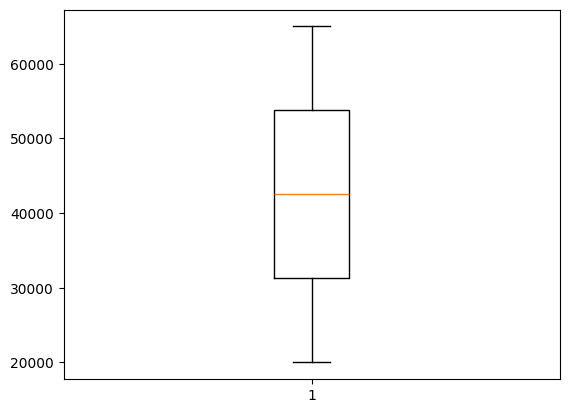

In [11]:
plt.boxplot(df["Salary"])
plt.show()

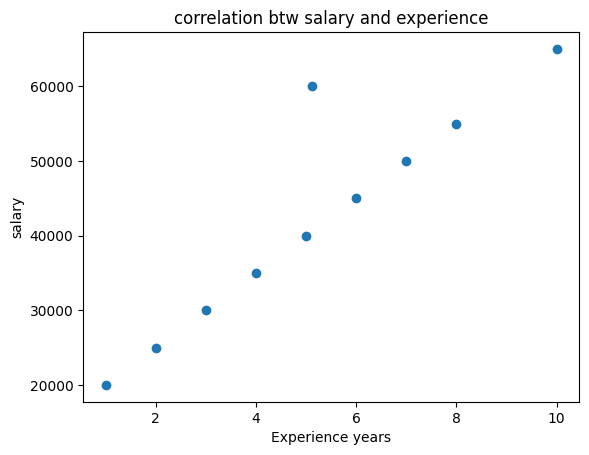

In [12]:
plt.scatter(df["Experience_Years"],df["Salary"])
plt.xlabel("Experience years")
plt.ylabel("salary")
plt.title("correlation btw salary and experience")
plt.show()

In [13]:
correlation=df["Experience_Years"].corr(df["Salary"])
correlation

np.float64(0.9137925557897891)

In [14]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [16]:
cat_col=df.select_dtypes(include=["object"]).columns
cat_col

Index(['Education_Level'], dtype='object')

In [17]:
#convert categorical to numerical column
le=LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])
le
df
le=LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])
le

LabelEncoder()

## Step 13 – Split into training and test sets

**What:** Use `train_test_split` to divide the data:
- **Training set**: used to fit the model.
- **Test set**: used to evaluate the model on unseen data.

**Why:**
- To estimate how well the model generalizes.
- To avoid overfitting (memorizing the training data).

**What we learn:**
- How to split data correctly for regression problems.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df[["Experience_Years"]] #independent variable)  # 2D feature matrix
Y=df["Salary"]   #dependetn variable # 1D target vector
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=20)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', Y_train.shape)
print('y_test shape:', Y_test.shape)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df[["Experience_Years"]] #independent variable) # 2D feature matrix 
Y=df["Salary"] #dependetn variable # 1D target vector 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=20)
print('X_train shape:', X_train.shape) 
print('X_test shape:', X_test.shape)
print('y_train shape:', Y_train.shape)
print('y_test shape:', Y_test.shape)
X_train #8 values training to the machine

X_train shape: (8, 1)
X_test shape: (2, 1)
y_train shape: (8,)
y_test shape: (2,)


,Experience_Years
8,5.111111
5,6.000000
0,1.000000
2,3.000000
6,7.000000
9,10.000000
4,5.000000
3,4.000000


In [19]:
X_test  #2 Experience years test

,Experience_Years
7,8.0
1,2.0


In [20]:
Y_train #8 salary values teach to machine 

8    60000
5    45000
0    20000
2    30000
6    50000
9    65000
4    40000
3    35000
Name: Salary, dtype: int64

In [21]:
Y_test   #2 values test we have the data

7    55000
1    25000
Name: Salary, dtype: int64

## Step 14 – Train the Simple Linear Regression model
**What:** Fit a `LinearRegression` model using the training data.

The model learns a line of the form:

\[ \hat{y} = b_0 + b_1 x \]

Where:
- \( x \) = `YearsExperience`
- \( \hat{y} \) = predicted `Salary`
- \( b_0 \) = intercept
- \( b_1 \) = slope (coefficient)

**Why:**
- To find the best-fitting straight line that minimizes squared errors.

**What we learn:**
- The values of intercept and coefficient, which describe the relationship.


In [22]:
model=LinearRegression()
model.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Interpreting the model parameters

- **Intercept (b0)**: Predicted salary when `YearsExperience = 0`.
- **Coefficient (b1)**: Change in predicted salary for each additional **1 year** of experience.

For example, if:
- `b1 = 9500`, then for every extra year of experience, the predicted salary increases by about 9500 units.


## Step 16 – Make predictions and evaluate the model

**What:**
- Use the trained model to predict `Salary` on the **test set**.
- Calculate regression evaluation metrics:
  - **Mean Absolute Error (MAE)** – average absolute difference between actual and predicted.
  - **Mean Squared Error (MSE)** – average squared difference.
  - **Root Mean Squared Error (RMSE)** – square root of MSE, in same units as target.
  - **R² score** – proportion of variance in salary explained by years of experience.

**Why:**
- To quantify how well the model performs.
- To understand typical prediction error.

**What we learn:**
- Whether the model is reasonably accurate for this simple problem.


In [24]:


#based on linear regression simple linear regression check all mean ,average of all values then give prediction



In [ ]:
import joblib
import os

save_path = r"C:\Users\vinod\OneDrive\Streamlit framework studying\model.pkl"

joblib.dump(model, save_path)

print("Model saved at:", save_path)
print("File exists:", os.path.exists(save_path))

Model saved at: C:\Users\vinod\OneDrive\Streamlit framework studying\model.pkl
File exists: True
